In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("cardio_train.csv")

In [3]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,output
0,0,18393,2,168,62,0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,0,100,60,1,1,0,0,0,0


In [4]:
data["age"] = round(data["age"] / 365)

In [5]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,output
0,0,50.0,2,168,62,0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85,0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64,0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82,0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56,0,100,60,1,1,0,0,0,0


In [6]:
data.shape

(70000, 14)

In [50]:
data.isnull().sum().sum()

0

In [8]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
output         0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Outlier Detection and Remove

In [10]:
def outlier(coloumn):
    Q1 = coloumn.quantile(0.25)
    Q3 = coloumn.quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    coloumn=np.where(coloumn>upper_whisker,upper_whisker,np.where(coloumn<lower_whisker,lower_whisker,coloumn))
#     sns.boxplot(coloumn)
    return coloumn

In [11]:
X=data.iloc[:,1:-1]
y=data.iloc[:,-1:]
print(X)

        age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      50.0       2     168      62      0    110           80     1      1   
1      55.0       1     156      85      0    140           90     3      1   
2      52.0       1     165      64      0    130           70     3      1   
3      48.0       2     169      82      0    150          100     1      1   
4      48.0       1     156      56      0    100           60     1      1   
...     ...     ...     ...     ...    ...    ...          ...   ...    ...   
69995  53.0       2     168      76      0    120           80     1      1   
69996  62.0       1     158     126      0    140           90     2      2   
69997  52.0       2     183     105      0    180           90     3      1   
69998  61.0       1     163      72      0    135           80     1      2   
69999  56.0       1     170      72      0    120           80     2      1   

       alco  active  cardio  
0         0       0  

In [12]:
# data['weight'] = outlier(data['weight'])

In [13]:
# sns.boxplot(data['weight'])

In [14]:
for i in data.iloc[:,1:-1]:
    data[i] = outlier(data[i])

<AxesSubplot:xlabel='ap_lo'>

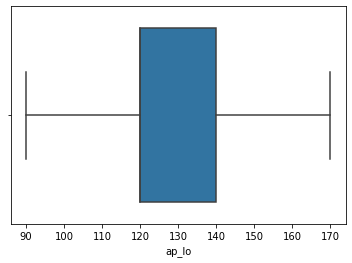

In [15]:
sns.boxplot(data['ap_lo']) 

# Stratified K-fold Cross Validation

In [16]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import cross_val_score
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier


# skfold=StratifiedKFold(n_splits=10)
# model=DecisionTreeClassifier()
# scores=cross_val_score(model,X,y,cv=skfold)
# print(np.mean(scores))

In [18]:
# model.fit(X_train, y_train)

In [19]:
# y_pred = model.predict(X_test)

In [20]:
# from sklearn.metrics import accuracy_score
# print ("Accuracy : ", accuracy_score(y_test, y_pred)) 

In [21]:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred) 
# print ("Confusion Matrix : \n", cm) 

In [22]:
skfold=StratifiedKFold(n_splits=5)
model=DecisionTreeClassifier()
scores=cross_val_score(model,X,y,cv=skfold)
print(np.mean(scores))

0.6349857142857143


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
min_max_scaler = MinMaxScaler()

In [25]:
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

In [26]:
model = RandomForestClassifier() 
model.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score,classification_report 
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 

Accuracy :  0.564


In [29]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import cross_val_score
# from sklearn import preprocessing
# from sklearn.ensemble import RandomForestClassifier


# skfold=StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
# model = RandomForestClassifier() 
# scores=cross_val_score(model,X,y,cv=skfold)
# print(np.mean(scores))

0.7064142857142858


In [37]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import cross_val_score
# from sklearn import preprocessing
# from sklearn.ensemble import RandomForestClassifier
# from statistics import mean, stdev

# skfold=StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
# lst_accu_stratified = []
# model = RandomForestClassifier()

# scaler = preprocessing.MinMaxScaler()
# x_scaled = scaler.fit_transform(X)
# lr = RandomForestClassifier()
# scores=cross_val_score(model,X,y,cv=skfold)

# for train_index, test_index in skfold.split(X, y):
#     x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
#     y_train_fold, y_test_fold = y[train_index], y[test_index]
#     lr.fit(x_train_fold, y_train_fold)
#     lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold))
    


In [38]:
# print(np.mean(scores))

# print('List of possible accuracy:', lst_accu_stratified)
# print('\nMaximum Accuracy That can be obtained from this model is:',
#       max(lst_accu_stratified)*100, '%')
# print('\nMinimum Accuracy:',
#       min(lst_accu_stratified)*100, '%')
# print('\nOverall Accuracy:',
#       mean(lst_accu_stratified)*100, '%')
# print('\nStandard Deviation is:', stdev(lst_accu_stratified))

In [44]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

def training(train, test, fold_no):
  x_train = data.iloc[:,1:-1]
  y_train = data.iloc[:,-1:]
  x_test = data.iloc[:,1:-1]
  y_test = data.iloc[:,-1:]
  model.fit(x_train, y_train)
  score = model.score(x_test,y_test)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

In [45]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

In [47]:
fold_no = 1
for train_index,test_index in skf.split(X, y):
  train = data.iloc[train_index,:]
  test = data.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1

For Fold 1 the accuracy is 0.9574571428571429
For Fold 2 the accuracy is 0.9574857142857143
For Fold 3 the accuracy is 0.9574714285714285
For Fold 4 the accuracy is 0.9574714285714285
For Fold 5 the accuracy is 0.9574714285714285
For Fold 6 the accuracy is 0.9574571428571429
For Fold 7 the accuracy is 0.9574857142857143
For Fold 8 the accuracy is 0.9574428571428572
For Fold 9 the accuracy is 0.9575
For Fold 10 the accuracy is 0.9574571428571429


(70000, 14)